202318041(Vishaka Nair)
202318047(Srushti Bhagchandani)

# **EDA**

In [ ]:
%%capture
%%bash
pip install imbalanced-learn

In [ ]:
#Read the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import sklearn as sk

In [ ]:
#Read credit data as df_train (training part)
df= pd.read_csv('/content/UCI_Credit_Card.csv', header=None)

In [ ]:
df.shape

(30001, 25)

In [ ]:
df.columns=df.iloc[0]

In [ ]:
df.drop(df.index[0],axis=0,inplace=True)

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
print(df.head(20))

0   ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  ...  \
0    1     20000   2         2        1  24     2     2    -1    -1  ...   
1    2    120000   2         2        2  26    -1     2     0     0  ...   
2    3     90000   2         2        2  34     0     0     0     0  ...   
3    4     50000   2         2        1  37     0     0     0     0  ...   
4    5     50000   1         2        1  57    -1     0    -1     0  ...   
5    6     50000   1         1        2  37     0     0     0     0  ...   
6    7     5e+05   1         1        2  29     0     0     0     0  ...   
7    8     1e+05   2         2        2  23     0    -1    -1     0  ...   
8    9    140000   2         3        1  28     0     0     2     0  ...   
9   10     20000   1         3        2  35    -2    -2    -2    -2  ...   
10  11     2e+05   2         3        2  34     0     0     2     0  ...   
11  12    260000   2         1        2  51    -1    -1    -1    -1  ...   
12  13    63

In [ ]:
#Missing data can occur when no information is provided for one or more items or for a whole unit. Missing data is a very big problem in a real-life scenarios.
#Check if there is any missing value with isna() function and sum to count the NaN values
df.isna().sum()
#As a result, there is no missing value result.But without NaN value, we have '?' in our dataset.

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
#Write a function to calculate IOR for each numerical attribute and show skewness
def detection_outlier(dfcolumn):
#Calculate Q1, Q3 and IQR
 Q1 = dfcolumn.quantile(0.25)
 Q3 = dfcolumn.quantile(0.75)
 IQR = Q3-Q1 #Interquartile range
#In general, constant should be 1.
 lower  = Q1-1*IQR
 higher = Q3+1*IQR
#Find number of outliers for specific column
 print('Before data preprocessing:')
 print('Skewness:',dfcolumn.skew())
 print(dfcolumn.describe())
 dfcolumn.loc[(dfcolumn> higher) | (dfcolumn< lower)]=dfcolumn.mean()
 print('After replacing outliers by mean:')
 print('Skewness:',dfcolumn.skew())
 print('Median:',dfcolumn.median())
 print('IQR value:',IQR)
 print('Lower,Higher:',lower,',',higher)
 return

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [ ]:
df.EDUCATION.unique()

array(['2', '1', '3', '5', '4', '6', '0'], dtype=object)

In [ ]:
#Find duplicates in dataframe
duplicate = df[df.duplicated()]
pd.set_option("display.max_rows", None)
print("Duplicate Rows :")
duplicate.head(10)

Duplicate Rows :


Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default.payment.next.month]
Index: []

[0 rows x 25 columns]

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
df.corr()

0                                 ID  LIMIT_BAL       SEX  EDUCATION  \
0                                                                      
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.023581   
BILL_AMT2                   0.017982   0.278314 -0.031183   0.018749   
BILL_AMT3                   0.024354   0.283236 -0.024563   0.013002   
BILL_AMT4                   0.040351   0.293988 -0.021880  -0.000451   
BILL_AMT5                   0.016705   0.295562 -0.017005  -0.007567   
BILL_AMT6                   0.016730   0.290389 -0.016733  -0.009099   
PAY_AMT1                    0.009742   0.195236 -0.000242  -0.037456   
PAY_AMT2                    0.008406   0.178408 -0.001391  -0.030038   
PAY_AMT3                    0.039151   0.210167 -0.008597  -0.039943   
PAY_AMT4                    0.007793   0.203242 -0.002229  -0.038218   
PAY_AMT5                    0.000652   0.217202 -0.001667  -0.040358   
PAY_AMT6                    0.003000   0.219595 -0.002766  -0.037200   
default.payment.next.month -0.013952  -0.153520 -0.039961   0.028006   

0                           MARRIAGE       AGE     PAY_0     PAY_2     PAY_3  \
0                                                                              
ID                         -0.029079  0.018678 -0.030575 -0.011215 -0.018494   
LIMIT_BAL                  -0.108139  0.144713 -0.271214 -0.296382 -0.286123   
SEX                        -0.031389 -0.090874 -0.057643 -0.070771 -0.066096   
EDUCATION                  -0.143464  0.175061  0.105364  0.121566  0.114025   
MARRIAGE                    1.000000 -0.414170  0.019917  0.024199  0.032688   
AGE                        -0.414170  1.000000 -0.039447 -0.050148 -0.053048   
PAY_0                       0.019917 -0.039447  1.000000  0.672164  0.574245   
PAY_2                       0.024199 -0.050148  0.672164  1.000000  0.766552   
PAY_3                       0.032688 -0.053048  0.574245  0.766552  1.000000   
PAY_4                       0.033122 -0.049722  0.538841  0.662067  0.777359   
PAY_5                       0.035629 -0.053826  0.509426  0.622780  0.686775   
PAY_6                       0.034345 -0.048773  0.474553  0.575501  0.632684   
BILL_AMT1                  -0.023472  0.056239  0.187068  0.234887  0.208473   
BILL_AMT2                  -0.021602  0.054283  0.189859  0.235257  0.237295   
BILL_AMT3                  -0.024909  0.053710  0.179785  0.224146  0.227494   
BILL_AMT4                  -0.023344  0.051353  0.179125  0.222237  0.227202   
BILL_AMT5                  -0.025393  0.049345  0.180635  0.221348  0.225145   
BILL_AMT6                  -0.021207  0.047613  0.176980  0.219403  0.222327   
PAY_AMT1                   -0.005979  0.026147 -0.079269 -0.080701  0.001295   
PAY_AMT2                   -0.008093  0.021785 -0.070101 -0.058990 -0.066793   
PAY_AMT3                   -0.003541  0.029247 -0.070561 -0.055901 -0.053311   
PAY_AMT4                   -0.012659  0.021379 -0.064005 -0.046858 -0.046067   
PAY_AMT5                   -0.001205  0.022850 -0.058190 -0.037093 -0.035863   
PAY_AMT6                   -0.006641  0.019478 -0.05867

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split=StratifiedShuffleSplit(n_splits=1,random_state=42,test_size=0.2)

In [ ]:
for train_index,test_index in split.split(df,df['default.payment.next.month']):
  strat_train=df.loc[train_index]
  strat_test=df.loc[test_index]

In [ ]:
strat_train.head(10)

0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
22788  22789   160000.0    2          2         2   33      2      2      3   
29006  29007   150000.0    2          1         2   34      1     -1     -1   
16950  16951    10000.0    1          2         1   50      1      2      0   
22280  22281   220000.0    2          1         2   29      0      0      0   
11346  11347   310000.0    2          1         2   32      1     -2     -1   
4102    4103   240000.0    2          1         2   36     -1     -1      2   
28654  28655   160000.0    2          3         2   33     -1      2      2   
26150  26151    50000.0    2          2         1   34      3      3      2   
15091  15092   360000.0    1          1         1   32      0      0      0   
6266    6267   320000.0    1          2         2   29      0      0      0   

0      PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
22788      2  ...   164310.0   162681.0   163005.0   15000.0       0.0   
29006     -2  ...        0.0        0.0        0.0      53.0       0.0   
16950      0  ...     8067.0     8227.0     8400.0       2.0    1281.0   
22280      0  ...   218513.0   131660.0   134346.0    9100.0    9000.0   
11346      0  ...      326.0     -235.0     -235.0       0.0     326.0   
4102       0  ...     5149.0    13750.0     5777.0    6959.0      15.0   
28654      2  ...    43228.0     -772.0     -772.0       0.0   43500.0   
26150      2  ...    46289.0    44837.0    44535.0    2000.0    2001.0   
15091      0  ...   134368.0   135626.0   134864.0    6000.0    6000.0   
6266       0  ...   322246.0   297637.0   301575.0   11650.0   12500.0   

0      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
22788       0.0    6100.0   12300.0    6100.0                           0  
29006       0.0       0.0       0.0       0.0                           0  
16950    1134.0     294.0     305.0    1000.0                           0  
22280    7887.0    4800.0    4900.0    6000.0                           1  
11346       0.0       0.0       0.0    1200.0                           0  
4102        0.0    7013.0       0.0     726.0                           1  
28654       0.0       0.0       0.0    3000.0                           0  
26150     499.0    2000.0    2000.0    1500.0                           1  
15091    8000.0    4918.0    5000.0    3300.0                           0  
6266    11900.0   10503.0   10886.0   10040.0                           0  

[10 rows x 25 columns]

In [ ]:
strat_test.head(10)

0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
6907    6908    50000.0    1          2         2   46     -1     -1     -1   
24575  24576   150000.0    1          1         1   31     -1     -1     -2   
26766  26767    50000.0    1          2         2   25      0      0      0   
2156    2157   290000.0    2          1         2   25      0      0      0   
3179    3180   500000.0    2          2         1   27     -2     -2     -2   
29382  29383   200000.0    1          1         1   29      1      2      0   
24454  24455   210000.0    1          2         2   31      0      0      0   
23886  23887   260000.0    1          3         2   35      0      0      0   
5504    5505   450000.0    2          1         1   42     -1     -1     -1   
29720  29721   150000.0    1          3         2   39      0      0      0   

0      PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
6907      -1  ...     2650.0     3320.0     2764.0   26060.0       0.0   
24575     -2  ...        0.0        0.0    11694.0       0.0       0.0   
26766      0  ...    49949.0    50479.0    50702.0    1800.0    1844.0   
2156       0  ...   248801.0   241983.0   230925.0   15000.0   10500.0   
3179      -2  ...    10000.0    10000.0    10000.0    9983.0   13587.0   
29382      0  ...   194775.0   197105.0   204122.0       0.0    8278.0   
24454      0  ...    88223.0    84175.0    80305.0    5000.0    4200.0   
23886      0  ...    45879.0    54264.0    59872.0   10000.0   10000.0   
5504      -1  ...     3446.0     6157.0        0.0       0.0    6281.0   
29720      0  ...    12418.0    12415.0    13211.0    2100.0    1500.0   

0      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
6907     3472.0    2320.0    1764.0    2841.0                           0  
24575       0.0       0.0   11694.0   30000.0                           0  
26766    2200.0    2000.0    1800.0    2038.0                           0  
2156    10000.0   15000.0    7844.0   23333.0                           1  
3179    10000.0   10000.0   10000.0   25304.0                           0  
29382    4100.0  180000.0  202317.0       0.0                           0  
24454    3100.0    3000.0    3100.0    3000.0                           0  
23886   10390.0   10009.0   10000.0   10000.0                           0  
5504     3446.0    6157.0       0.0   14380.0                           0  
29720    1500.0     500.0    1000.0    2300.0                           0  

[10 rows x 25 columns]

In [ ]:
X_train=strat_train.drop(columns=['default.payment.next.month'])

In [ ]:
X_train.head(10)

0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
22788  22789   160000.0    2          2         2   33      2      2      3   
29006  29007   150000.0    2          1         2   34      1     -1     -1   
16950  16951    10000.0    1          2         1   50      1      2      0   
22280  22281   220000.0    2          1         2   29      0      0      0   
11346  11347   310000.0    2          1         2   32      1     -2     -1   
4102    4103   240000.0    2          1         2   36     -1     -1      2   
28654  28655   160000.0    2          3         2   33     -1      2      2   
26150  26151    50000.0    2          2         1   34      3      3      2   
15091  15092   360000.0    1          1         1   32      0      0      0   
6266    6267   320000.0    1          2         2   29      0      0      0   

0      PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
22788      2  ...   168541.0   164310.0   162681.0   163005.0   15000.0   
29006     -2  ...        0.0        0.0        0.0        0.0      53.0   
16950      0  ...     8446.0     8067.0     8227.0     8400.0       2.0   
22280      0  ...   215139.0   218513.0   131660.0   134346.0    9100.0   
11346      0  ...      326.0      326.0     -235.0     -235.0       0.0   
4102       0  ...     6649.0     5149.0    13750.0     5777.0    6959.0   
28654      2  ...    44255.0    43228.0     -772.0     -772.0       0.0   
26150      2  ...    48602.0    46289.0    44837.0    44535.0    2000.0   
15091      0  ...   128518.0   134368.0   135626.0   134864.0    6000.0   
6266       0  ...   325024.0   322246.0   297637.0   301575.0   11650.0   

0      PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
22788       0.0       0.0    6100.0   12300.0    6100.0  
29006       0.0       0.0       0.0       0.0       0.0  
16950    1281.0    1134.0     294.0     305.0    1000.0  
22280    9000.0    7887.0    4800.0    4900.0    6000.0  
11346     326.0       0.0       0.0       0.0    1200.0  
4102       15.0       0.0    7013.0       0.0     726.0  
28654   43500.0       0.0       0.0       0.0    3000.0  
26150    2001.0     499.0    2000.0    2000.0    1500.0  
15091    6000.0    8000.0    4918.0    5000.0    3300.0  
6266    12500.0   11900.0   10503.0   10886.0   10040.0  

[10 rows x 24 columns]

In [ ]:
Y_train=strat_train['default.payment.next.month']

In [ ]:
X_test=strat_test.drop(columns=['default.payment.next.month'])

In [ ]:
Y_test=strat_test['default.payment.next.month']

# **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [ ]:
 X_train1=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [ ]:
X_train.head(10)

0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
22788  22789   160000.0    2          2         2   33      2      2      3   
29006  29007   150000.0    2          1         2   34      1     -1     -1   
16950  16951    10000.0    1          2         1   50      1      2      0   
22280  22281   220000.0    2          1         2   29      0      0      0   
11346  11347   310000.0    2          1         2   32      1     -2     -1   
4102    4103   240000.0    2          1         2   36     -1     -1      2   
28654  28655   160000.0    2          3         2   33     -1      2      2   
26150  26151    50000.0    2          2         1   34      3      3      2   
15091  15092   360000.0    1          1         1   32      0      0      0   
6266    6267   320000.0    1          2         2   29      0      0      0   

0      PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
22788      2  ...   168541.0   164310.0   162681.0   163005.0   15000.0   
29006     -2  ...        0.0        0.0        0.0        0.0      53.0   
16950      0  ...     8446.0     8067.0     8227.0     8400.0       2.0   
22280      0  ...   215139.0   218513.0   131660.0   134346.0    9100.0   
11346      0  ...      326.0      326.0     -235.0     -235.0       0.0   
4102       0  ...     6649.0     5149.0    13750.0     5777.0    6959.0   
28654      2  ...    44255.0    43228.0     -772.0     -772.0       0.0   
26150      2  ...    48602.0    46289.0    44837.0    44535.0    2000.0   
15091      0  ...   128518.0   134368.0   135626.0   134864.0    6000.0   
6266       0  ...   325024.0   322246.0   297637.0   301575.0   11650.0   

0      PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
22788       0.0       0.0    6100.0   12300.0    6100.0  
29006       0.0       0.0       0.0       0.0       0.0  
16950    1281.0    1134.0     294.0     305.0    1000.0  
22280    9000.0    7887.0    4800.0    4900.0    6000.0  
11346     326.0       0.0       0.0       0.0    1200.0  
4102       15.0       0.0    7013.0       0.0     726.0  
28654   43500.0       0.0       0.0       0.0    3000.0  
26150    2001.0     499.0    2000.0    2000.0    1500.0  
15091    6000.0    8000.0    4918.0    5000.0    3300.0  
6266    12500.0   11900.0   10503.0   10886.0   10040.0  

[10 rows x 24 columns]

In [ ]:
X_train1.head(10)

0        ID  LIMIT_BAL      SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
0  0.904395  -0.056866  0.80844   0.184523  0.856739 -0.264558  1.793311   
1  1.623947  -0.134081  0.80844  -1.077532  0.856739 -0.155804  0.902944   
2  0.228817  -1.215090 -1.23695   0.184523 -1.059367  1.584260  0.902944   
3  0.845609   0.406423  0.80844  -1.077532  0.856739 -0.699574  0.012576   
4 -0.419683   1.101358  0.80844  -1.077532  0.856739 -0.373312  0.902944   
5 -1.257965   0.560853  0.80844  -1.077532  0.856739  0.061704 -0.877791   
6  1.583214  -0.056866  0.80844   1.446579  0.856739 -0.264558 -0.877791   
7  1.293449  -0.906231  0.80844   0.184523 -1.059367 -0.155804  2.683678   
8  0.013692   1.487433 -1.23695  -1.077532 -1.059367 -0.373312  0.012576   
9 -1.007545   1.178573 -1.23695   0.184523  0.856739 -0.699574  0.012576   

0     PAY_2     PAY_3     PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  1.780193  2.652046  1.911811  ...   1.778869   1.891679   2.020839   
1 -0.722324 -0.697642 -1.530826  ...  -0.685090  -0.673845  -0.662488   
2  1.780193  0.139780  0.190493  ...  -0.561615  -0.547887  -0.526789   
3  0.111849  0.139780  0.190493  ...   2.460102   2.738001   1.509166   
4 -1.556496 -0.697642  0.190493  ...  -0.680324  -0.668755  -0.666365   
5 -0.722324  1.814624  0.190493  ...  -0.587886  -0.593449  -0.435690   
6  1.780193  1.814624  1.911811  ...  -0.038111   0.001114  -0.675222   
7  2.614365  1.814624  1.911811  ...   0.025439   0.048908   0.077072   
8  0.111849  0.139780  0.190493  ...   1.193759   1.424167   1.574583   
9  0.111849  0.139780  0.190493  ...   4.066549   4.357680   4.246859   

0  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0   2.096346  0.580657 -0.290332 -0.297820  0.086961  0.500397  0.048745  
1  -0.652126 -0.344969 -0.290332 -0.297820 -0.318075 -0.316978 -0.292992  
2  -0.510492 -0.348128 -0.227081 -0.233069 -0.298554 -0.296710 -0.236970  
3   1.613118  0.215287  0.154056  0.152526  0.000642  0.008643  0.043143  
4  -0.656089 -0.348251 -0.274236 -0.297820 -0.318075 -0.316978 -0.225765  
5  -0.554719  0.082700 -0.289592 -0.297820  0.147584 -0.316978 -0.252320  
6  -0.665143 -0.348251  1.857544 -0.297820 -0.318075 -0.316978 -0.124925  
7   0.098791 -0.224397 -0.191530 -0.269327 -0.185276 -0.184072 -0.208959  
8   1.621852  0.023312  0.005926  0.158979  0.008477  0.015288 -0.108118  
9   4.432812  0.373201  0.326873  0.381668  0.379318  0.406432  0.269473  

[10 rows x 24 columns]

In [ ]:
education_col=pd.DataFrame(X_train['EDUCATION'])

In [ ]:
education_col.rename(columns={'EDUCATION':'Education'},inplace=True)

In [ ]:
education_col=education_col.reset_index(drop=True)

In [ ]:
print(education_col.index)

RangeIndex(start=0, stop=24000, step=1)


In [ ]:
X_train1=pd.concat([X_train1,education_col],axis=1)

In [ ]:
X_train1.head(10)

ID  LIMIT_BAL      SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
0  0.904395  -0.056866  0.80844   0.184523  0.856739 -0.264558  1.793311   
1  1.623947  -0.134081  0.80844  -1.077532  0.856739 -0.155804  0.902944   
2  0.228817  -1.215090 -1.23695   0.184523 -1.059367  1.584260  0.902944   
3  0.845609   0.406423  0.80844  -1.077532  0.856739 -0.699574  0.012576   
4 -0.419683   1.101358  0.80844  -1.077532  0.856739 -0.373312  0.902944   
5 -1.257965   0.560853  0.80844  -1.077532  0.856739  0.061704 -0.877791   
6  1.583214  -0.056866  0.80844   1.446579  0.856739 -0.264558 -0.877791   
7  1.293449  -0.906231  0.80844   0.184523 -1.059367 -0.155804  2.683678   
8  0.013692   1.487433 -1.23695  -1.077532 -1.059367 -0.373312  0.012576   
9 -1.007545   1.178573 -1.23695   0.184523  0.856739 -0.699574  0.012576   

      PAY_2     PAY_3     PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0  1.780193  2.652046  1.911811  ...   1.891679   2.020839   2.096346   
1 -0.722324 -0.697642 -1.530826  ...  -0.673845  -0.662488  -0.652126   
2  1.780193  0.139780  0.190493  ...  -0.547887  -0.526789  -0.510492   
3  0.111849  0.139780  0.190493  ...   2.738001   1.509166   1.613118   
4 -1.556496 -0.697642  0.190493  ...  -0.668755  -0.666365  -0.656089   
5 -0.722324  1.814624  0.190493  ...  -0.593449  -0.435690  -0.554719   
6  1.780193  1.814624  1.911811  ...   0.001114  -0.675222  -0.665143   
7  2.614365  1.814624  1.911811  ...   0.048908   0.077072   0.098791   
8  0.111849  0.139780  0.190493  ...   1.424167   1.574583   1.621852   
9  0.111849  0.139780  0.190493  ...   4.357680   4.246859   4.432812   

   PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Education  
0  0.580657 -0.290332 -0.297820  0.086961  0.500397  0.048745          2  
1 -0.344969 -0.290332 -0.297820 -0.318075 -0.316978 -0.292992          1  
2 -0.348128 -0.227081 -0.233069 -0.298554 -0.296710 -0.236970          2  
3  0.215287  0.154056  0.152526  0.000642  0.008643  0.043143          1  
4 -0.348251 -0.274236 -0.297820 -0.318075 -0.316978 -0.225765          1  
5  0.082700 -0.289592 -0.297820  0.147584 -0.316978 -0.252320          1  
6 -0.348251  1.857544 -0.297820 -0.318075 -0.316978 -0.124925          3  
7 -0.224397 -0.191530 -0.269327 -0.185276 -0.184072 -0.208959          2  
8  0.023312  0.005926  0.158979  0.008477  0.015288 -0.108118          1  
9  0.373201  0.326873  0.381668  0.379318  0.406432  0.269473          2  

[10 rows x 25 columns]

In [ ]:
X_train1.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Education    0
dtype: int64

In [ ]:
def division(U):
  a_data =U.loc[U['Education'] == 0]    #0=-2.33958802
  b_data =U.loc[U['Education'] == 1]    #1=-1.077532
  c_data =U.loc[U['Education'] ==2]    #2=0.18452304
  d_data =U.loc[U['Education'] == 3]    #3=1.446579
  e_data =U.loc[U['Education'] ==4]    #4=2.7086341
  f_data =U.loc[U['Education'] == 5]    #5=3.97068963
  g_data =U.loc[U['Education'] ==6]    #6= 5.23274516
  a_data.drop(columns=['Education','ID'],inplace=True)
  b_data.drop(columns=['Education','ID'],inplace=True)
  c_data.drop(columns=['Education','ID'],inplace=True)
  d_data.drop(columns=['Education','ID'],inplace=True)
  e_data.drop(columns=['Education','ID'],inplace=True)
  f_data.drop(columns=['Education','ID'],inplace=True)
  g_data.drop(columns=['Education','ID'],inplace=True)



  return a_data,b_data,c_data,d_data,e_data,f_data,g_data



In [ ]:
A,B,C,D,E,F,G=division(X_train1)
print(G.head(10))


      LIMIT_BAL      SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
1072  -1.060660 -1.23695   5.232745 -1.059367  1.910522 -1.768158 -1.556496   
1280   2.414012 -1.23695   5.232745  0.856739  1.475506 -1.768158 -1.556496   
2129  -0.597371  0.80844   5.232745  2.772846  1.149244  0.012576  0.111849   
2187   1.564648 -1.23695   5.232745 -1.059367 -0.808328  0.012576 -0.722324   
2705  -0.674586  0.80844   5.232745  0.856739  1.693014  0.012576  0.111849   
2799   0.869713  0.80844   5.232745  2.772846  0.279212  0.012576  0.111849   
3063  -0.134081  0.80844   5.232745 -1.059367  1.257998  0.012576  0.111849   
3567  -1.137875 -1.23695   5.232745  0.856739 -0.917082 -0.877791 -0.722324   
3761  -0.134081  0.80844   5.232745  0.856739  0.496720  0.012576  0.111849   
4283   0.251994  0.80844   5.232745  0.856739  1.693014  1.793311  0.111849   

         PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
1072 -1.535065 -1.530826 -1.537252  ...  -0.685090  -0

<ipython-input-39-f9598fa853d3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_data.drop(columns=['Education','ID'],inplace=True)
<ipython-input-39-f9598fa853d3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_data.drop(columns=['Education','ID'],inplace=True)
<ipython-input-39-f9598fa853d3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_data.drop(columns=['Education','ID'],inplace=True)
<ipython-input-39-f9598fa853d3>:12:

In [ ]:
A.describe()

LIMIT_BAL        SEX  EDUCATION   MARRIAGE        AGE      PAY_0  \
count  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000   
mean    0.457900  -0.384704  -2.339588   0.377712   0.360778  -0.581002   
std     0.596592   1.053230   0.000000   0.866592   0.855230   0.955441   
min    -0.520156  -1.236950  -2.339588  -1.059367  -0.808328  -1.768158   
25%     0.174779  -1.236950  -2.339588   0.377712  -0.182992  -1.100383   
50%     0.367816  -1.236950  -2.339588   0.856739   0.224835  -0.877791   
75%     0.715283   0.808440  -2.339588   0.856739   1.094867   0.012576   
max     1.487433   0.808440  -2.339588   0.856739   1.910522   0.902944   

           PAY_2      PAY_3      PAY_4      PAY_5  ...  BILL_AMT3  BILL_AMT4  \
count  12.000000  12.000000  12.000000  12.000000  ...  12.000000  12.000000   
mean   -0.791838  -0.697642  -0.598445  -0.796622  ...  -0.527994  -0.516861   
std     0.661466   0.944740   1.002238   0.637896  ...   0.249951   0.202304   
min    -1.556496  -1.535065  -1.530826  -1.537252  ...  -0.685090  -0.673845   
25%    -1.556496  -1.535065  -1.530826  -1.537252  ...  -0.666670  -0.663372   
50%    -0.722324  -0.697642  -0.670167  -0.648496  ...  -0.635552  -0.608321   
75%    -0.513781  -0.697642  -0.455002  -0.648496  ...  -0.508280  -0.470071   
max     0.111849   1.814624   1.911811   0.240260  ...   0.207333  -0.137585   

       BILL_AMT5  BILL_AMT6   PAY_AMT1   PAY_AMT2   PAY_AMT3   PAY_AMT4  \
count  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000   
mean   -0.575581  -0.607303   0.017217   0.161964   0.189641  -0.053645   
std     0.167345   0.044706   0.457215   0.843189   0.676877   0.462604   
min    -0.662488  -0.652126  -0.348251  -0.290332  -0.297820  -0.318075   
25%    -0.658542  -0.647966  -0.301187  -0.249646  -0.259520  -0.314241   
50%    -0.615521  -0.621051  -0.109212  -0.122823  -0.227473  -0.199054   
75%    -0.591167  -0.573397   0.044135   0.249686   0.431587  -0.030018   
max    -0.055873  -0.520457   1.076075   2.738865   1.627472   1.342441   

        PAY_AMT5   PAY_AMT6  
count  12.000000  12.000000  
mean   -0.130560  -0.135807  
std     0.168886   0.239125  
min    -0.316978  -0.292992  
25%    -0.252369  -0.292992  
50%    -0.184637  -0.192908  
75%    -0.006691  -0.100555  
max     0.201956   0.568690  

[8 rows x 23 columns]

# **Kmeans clustering**

In [ ]:
!pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 4.8 MB/s eta 0:00:00


In [ ]:
import prince

In [ ]:
import numpy as np
import pandas as pd
from prince import FAMD
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
X_train2=X_train1.drop(['Education','ID'],axis=1)

In [ ]:
X_train2.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [ ]:
X_train3=X_train.drop(columnns=["ID",""])

In [ ]:
# Kmeans Clustering

## Parameter setting 0
db0 = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=0.0001,verbose=0, random_state=None, copy_x=True, algorithm='auto')
db0.fit(X_train2)
y_pred_0 = db0.predict(X_train2)


print(db0.cluster_centers_)


[[ 0.87621044 -0.0610741  -0.05633374 -0.10615116  0.17042169  0.22775103
   0.28480387  0.290014    0.3191135   0.35273845  0.37303916  1.97754898
   2.03534017  2.07588085  2.08967766  2.06098539  2.01531845  0.62565172
   0.5559382   0.54657659  0.52782188  0.52981383  0.4586692 ]
 [ 0.41379385  0.09102022 -0.2377143  -0.09584084  0.10426359 -0.65864309
  -0.84573193 -0.88382491 -0.90054312 -0.8966535  -0.85800139 -0.55505594
  -0.57947523 -0.58663807 -0.57812195 -0.55820865 -0.54292396 -0.04309579
  -0.02399361 -0.00676231  0.01139731  0.00344851  0.01757288]
 [-0.48150132 -0.04619472  0.17142972  0.0887487  -0.10947537  0.38467339
   0.49573829  0.51985945  0.52413694  0.51363719  0.48314155 -0.09596247
  -0.09331154 -0.09808418 -0.10699704 -0.11349636 -0.11292184 -0.11853333
  -0.11484106 -0.12410407 -0.13177469 -0.12695425 -0.11961302]]


In [ ]:
centers_r=db0.cluster_centers_

In [ ]:
## Parameter setting 1
db1 = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001,verbose=0, random_state=None, copy_x=True, algorithm='auto')
db1.fit(X_train2)
y_pred_1 = db1.predict(X_train2)

In [ ]:
X_train2['y_pred_0']=y_pred_0
X_train2['y_pred_1']=y_pred_1

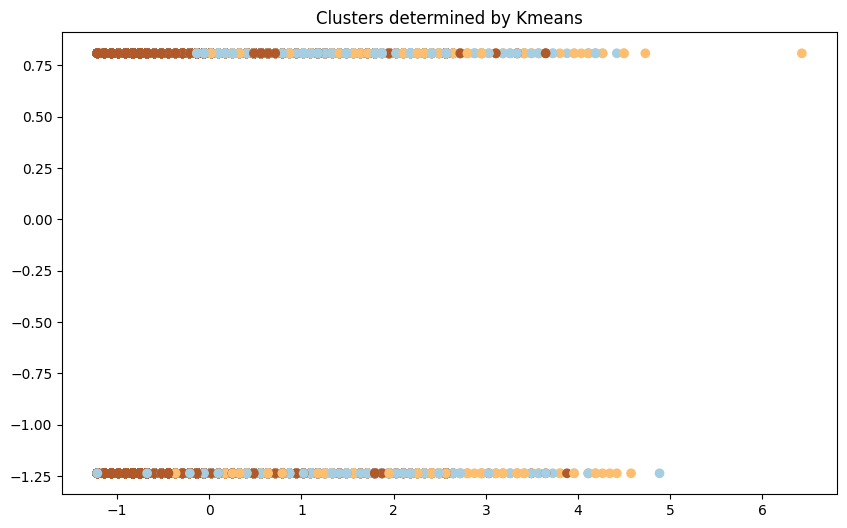

In [ ]:
# Kmeans Visualization
plt.figure(figsize=(10,6))
plt.scatter(X_train2.iloc[:,0], X_train2.iloc[:,1],c=y_pred_0, cmap='Paired')
plt.title("Clusters determined by Kmeans")
db0.labels_[db0.labels_ == -1].size
plt.show()

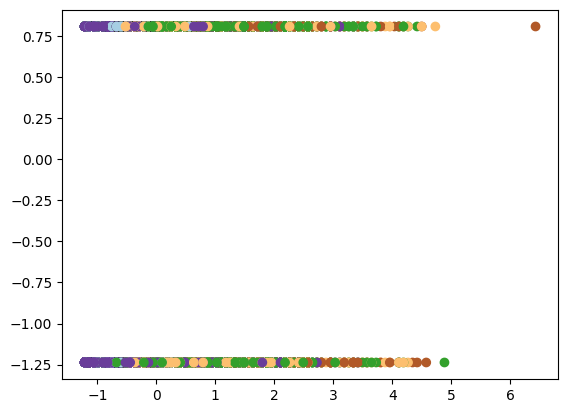

In [ ]:
plt.scatter(X_train2.iloc[:,0], X_train2.iloc[:,1],c=y_pred_1, cmap='Paired')
plt.show()

In [ ]:
A_scaled=scaler.transform(A)
B_scaled=scaler.transform(B)
C_scaled=scaler.transform(C)
D_scaled=scaler.transform(D)
E_scaled=scaler.transform(E)
F_scaled=scaler.transform(F)
G_scaled=scaler.transform(G)


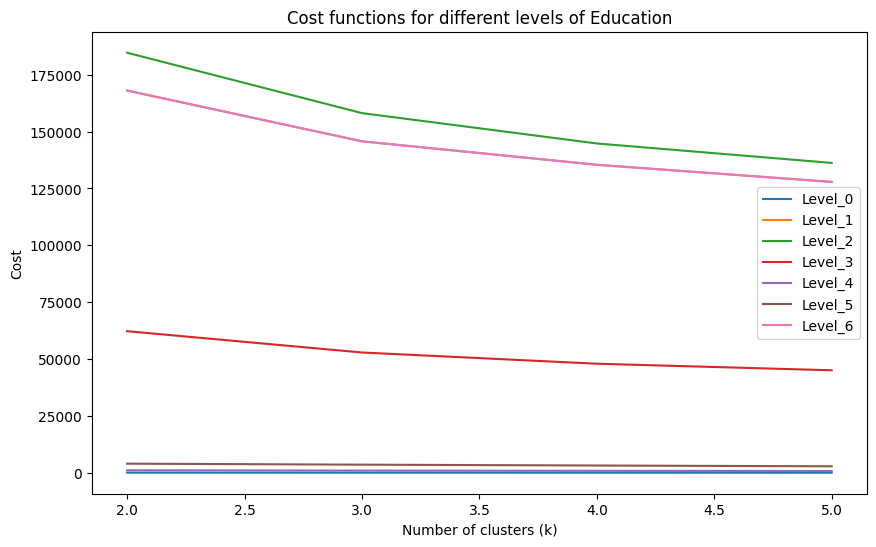

[72.35347475461302, 58.380314534569955, 49.33516834497501, 37.516525931321596]
[168026.2289837876, 145703.93742293, 135398.83409114162, 127870.04812960193]
[184653.912518023, 158103.26597212267, 144764.61884801785, 136220.03351207968]
[62250.3928942055, 52885.54470812975, 47948.84004798167, 45069.21345897434]
[1107.5824270869018, 968.3354176056314, 872.7618659850406, 789.3655777209586]
[4019.6923594037353, 3582.3568714750063, 3205.5392749681, 2859.42663004457]
[1132.3594694255755, 877.868297735139, 709.4311353817891, 639.488225111026]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have divided your data into male and female dataframes, let's call them male_data and female_data
# Perform KMeans clustering for males
k_values = [2, 3, 4, 5]  # Define the values of k for clustering
costs_0 = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
    kmeans.fit(A)  # Fit KMeans to male data
    costs_0.append(kmeans.inertia_)  # Inertia_ gives the sum of squared distances of samples to their closest cluster center

# Perform KMeans clustering for females
costs_1 = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
    kmeans.fit(B)  # Fit KMeans to female data
    costs_1.append(kmeans.inertia_)
     # Inertia_ gives the sum of squared distances of samples to their closest cluster center
costs_2 = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
    kmeans.fit(C)  # Fit KMeans to female data
    costs_2.append(kmeans.inertia_)

costs_3 = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
    kmeans.fit(D)  # Fit KMeans to female data
    costs_3.append(kmeans.inertia_)

costs_4 = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
    kmeans.fit(E)  # Fit KMeans to female data
    costs_4.append(kmeans.inertia_)

costs_5 = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
    kmeans.fit(F)  # Fit KMeans to female data
    costs_5.append(kmeans.inertia_)

costs_6 = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
    kmeans.fit(G)  # Fit KMeans to female data
    costs_6.append(kmeans.inertia_)

# Plot the cost function for males and females
plt.figure(figsize=(10, 6))
plt.plot(k_values, costs_0, label='Level_0')
plt.plot(k_values, costs_1, label='Level_1')
plt.plot(k_values, costs_2, label='Level_2')
plt.plot(k_values, costs_3, label='Level_3')
plt.plot(k_values, costs_4, label='Level_4')
plt.plot(k_values, costs_5, label='Level_5')
plt.plot(k_values, costs_1, label='Level_6')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Cost functions for different levels of Education')
plt.legend()
plt.show()
print(costs_0)
print(costs_1)
print(costs_2)
print(costs_3)
print(costs_4)
print(costs_5)
print(costs_6)


In [ ]:
cluster_0 = set(y_pred_0)
cluster_1 = set(y_pred_1)

In [ ]:
print(cluster_0)

{0, 1, 2}


In [ ]:
print(cluster_1)

{0, 1, 2, 3, 4}


# **Functions**

In [ ]:
def initialize_centers(U, k):
    # Randomly select k data points as initial centers
    indices = np.random.choice(U.index, size=k, replace=False)
    centers = U.loc[indices]
    return centers


In [ ]:
X_train2.head(10)

LIMIT_BAL      SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0  -0.056866  0.80844   0.184523  0.856739 -0.264558  1.793311  1.780193   
1  -0.134081  0.80844  -1.077532  0.856739 -0.155804  0.902944 -0.722324   
2  -1.215090 -1.23695   0.184523 -1.059367  1.584260  0.902944  1.780193   
3   0.406423  0.80844  -1.077532  0.856739 -0.699574  0.012576  0.111849   
4   1.101358  0.80844  -1.077532  0.856739 -0.373312  0.902944 -1.556496   
5   0.560853  0.80844  -1.077532  0.856739  0.061704 -0.877791 -0.722324   
6  -0.056866  0.80844   1.446579  0.856739 -0.264558 -0.877791  1.780193   
7  -0.906231  0.80844   0.184523 -1.059367 -0.155804  2.683678  2.614365   
8   1.487433 -1.23695  -1.077532 -1.059367 -0.373312  0.012576  0.111849   
9   1.178573 -1.23695   0.184523  0.856739 -0.699574  0.012576  0.111849   

      PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  2.652046  1.911811  0.240260  ...   1.778869   1.891679   2.020839   
1 -0.697642 -1.530826 -1.537252  ...  -0.685090  -0.673845  -0.662488   
2  0.139780  0.190493  0.240260  ...  -0.561615  -0.547887  -0.526789   
3  0.139780  0.190493  0.240260  ...   2.460102   2.738001   1.509166   
4 -0.697642  0.190493  0.240260  ...  -0.680324  -0.668755  -0.666365   
5  1.814624  0.190493 -0.648496  ...  -0.587886  -0.593449  -0.435690   
6  1.814624  1.911811  2.017773  ...  -0.038111   0.001114  -0.675222   
7  1.814624  1.911811  2.017773  ...   0.025439   0.048908   0.077072   
8  0.139780  0.190493  0.240260  ...   1.193759   1.424167   1.574583   
9  0.139780  0.190493  0.240260  ...   4.066549   4.357680   4.246859   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0   2.096346  0.580657 -0.290332 -0.297820  0.086961  0.500397  0.048745  
1  -0.652126 -0.344969 -0.290332 -0.297820 -0.318075 -0.316978 -0.292992  
2  -0.510492 -0.348128 -0.227081 -0.233069 -0.298554 -0.296710 -0.236970  
3   1.613118  0.215287  0.154056  0.152526  0.000642  0.008643  0.043143  
4  -0.656089 -0.348251 -0.274236 -0.297820 -0.318075 -0.316978 -0.225765  
5  -0.554719  0.082700 -0.289592 -0.297820  0.147584 -0.316978 -0.252320  
6  -0.665143 -0.348251  1.857544 -0.297820 -0.318075 -0.316978 -0.124925  
7   0.098791 -0.224397 -0.191530 -0.269327 -0.185276 -0.184072 -0.208959  
8   1.621852  0.023312  0.005926  0.158979  0.008477  0.015288 -0.108118  
9   4.432812  0.373201  0.326873  0.381668  0.379318  0.406432  0.269473  

[10 rows x 23 columns]

In [ ]:
centers=initialize_centers(X_train2,3)

In [ ]:
print(centers)

       LIMIT_BAL      SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
14062  -0.211296  0.80844   0.184523  0.856739 -0.699574  0.012576  0.111849   
22703   0.406423 -1.23695   1.446579 -1.059367  0.931736 -0.877791 -0.722324   
19034   0.174779  0.80844  -1.077532  0.856739  0.496720 -0.877791 -0.722324   

          PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
14062  0.139780  0.190493  0.240260  ...  -0.409340  -0.361629  -0.312576   
22703 -0.697642 -0.670167 -0.648496  ...  -0.679535  -0.667912   0.272135   
19034 -0.697642 -0.670167 -0.648496  ...  -0.670602  -0.663446  -0.646142   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
14062  -0.296606 -0.162470 -0.142203 -0.126521 -0.085677 -0.184072 -0.180947  
22703   0.316318 -0.324719 -0.271569 -0.276122  3.444313 -0.184072 -0.180947  
19034  -0.629937 -0.286881 -0.241400 -0.259791 -0.252273 -0.229526 -0.247278  

[3 rows x 23 columns]


In [ ]:
print(len(A))

12


In [ ]:
A1=pd.DataFrame(A)
print(A1.head(10))
B1=pd.DataFrame(B)
print(B1.head(10))


0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
27155  27156   160000.0    1          0         1   47     -1     -1     -1   
20030  20031   200000.0    2          0         2   30     -1     -1      2   
15107  15108   210000.0    1          0         2   45     -2     -2     -2   
24137  24138   150000.0    1          0         2   28      0      0      0   
3769    3770   290000.0    2          0         2   38      1     -1     -1   
6876    6877   360000.0    1          0         2   30      0      0     -1   
23234  23235   220000.0    2          0         1   35     -2     -2     -2   
27270  27271   250000.0    1          0         1   35     -2     -2     -2   
16881  16882   100000.0    1          0         2   37      0      0     -2   
16896  16897   200000.0    1          0         2   40      1     -2     -1   

0      PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
27155     -1  ...     3707.0     6987.0     3853.0     

In [ ]:
print(y_pred_0)

[1 0 2 ... 2 0 0]


In [ ]:
  U_partition = []
  for cluster_label in range(3):
        # Filter data points belonging to the current cluster
    cluster_data = X_train2[y_pred_0 == cluster_label]

        # Create a DataFrame for the current cluster
    cluster_df = pd.DataFrame(data=cluster_data, columns=X_train2.columns)

    cluster_df.drop(columns=['y_pred_0','y_pred_1'],inplace=True)

        # Append the DataFrame to the list
    U_partition.append(cluster_df)

In [ ]:
print((U_partition[:2]))

[       LIMIT_BAL      SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0      -0.056866  0.80844   0.184523  0.856739 -0.264558  1.793311  1.780193   
3       0.406423  0.80844  -1.077532  0.856739 -0.699574  0.012576  0.111849   
8       1.487433 -1.23695  -1.077532 -1.059367 -0.373312  0.012576  0.111849   
9       1.178573 -1.23695   0.184523  0.856739 -0.699574  0.012576  0.111849   
14      0.329208 -1.23695   1.446579 -1.059367 -0.699574  0.902944  1.780193   
17     -0.056866 -1.23695  -1.077532 -1.059367  0.605474 -1.768158 -1.556496   
20      1.719077  0.80844   0.184523  0.856739  0.170458  0.012576  0.111849   
33     -0.056866 -1.23695   3.970690 -1.059367 -0.808328  0.012576  0.111849   
47      1.255788 -1.23695   1.446579 -1.059367  1.475506  0.012576  0.111849   
49      0.020349  0.80844   0.184523 -1.059367  1.040490  0.012576  0.111849   
52      1.487433  0.80844   0.184523 -1.059367 -0.047050  1.793311  1.780193   
62      0.097564 -1.23695   0.184523  0

In [ ]:
for i, df in enumerate(U_partition):
    print(f"Cluster {i+1}:")
    print(df.head(5))
    print()

Cluster 1:
    LIMIT_BAL      SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0   -0.056866  0.80844   0.184523  0.856739 -0.264558  1.793311  1.780193   
3    0.406423  0.80844  -1.077532  0.856739 -0.699574  0.012576  0.111849   
8    1.487433 -1.23695  -1.077532 -1.059367 -0.373312  0.012576  0.111849   
9    1.178573 -1.23695   0.184523  0.856739 -0.699574  0.012576  0.111849   
14   0.329208 -1.23695   1.446579 -1.059367 -0.699574  0.902944  1.780193   

       PAY_3     PAY_4    PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0   2.652046  1.911811  0.24026  ...   1.778869   1.891679   2.020839   
3   0.139780  0.190493  0.24026  ...   2.460102   2.738001   1.509166   
8   0.139780  0.190493  0.24026  ...   1.193759   1.424167   1.574583   
9   0.139780  0.190493  0.24026  ...   4.066549   4.357680   4.246859   
14  0.139780  0.190493  0.24026  ...   2.229905   2.363657   2.570252   

    BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0    2.0963

In [ ]:
for partition in U_partition:
  print(len(partition))

2971
8402
12627


In [ ]:
for partition in U_partition:
      X=pd.merge(partition,A,how='inner')
      print(X.head(10))

0     ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0  27156   160000.0    1          0         1   47     -1     -1     -1   
1  20031   200000.0    2          0         2   30     -1     -1      2   
2  15108   210000.0    1          0         2   45     -2     -2     -2   
3  24138   150000.0    1          0         2   28      0      0      0   
4   3770   290000.0    2          0         2   38      1     -1     -1   
5   6877   360000.0    1          0         2   30      0      0     -1   
6  23235   220000.0    2          0         1   35     -2     -2     -2   
7  27271   250000.0    1          0         1   35     -2     -2     -2   
8  16882   100000.0    1          0         2   37      0      0     -2   
9  16897   200000.0    1          0         2   40      1     -2     -1   

0  PAY_4  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0     -1  ...     3853.0     4613.0     907.0    3707.0    6991.0      77.0   
1     -1  ...   

In [ ]:
for partition in U_partition:
      X=pd.merge(partition,A,how='inner')
      #intersection_A = len(partition[partition.isin(A)].dropna())
      #X=partition[partition.isin(A)].dropna()
      #X=pd.DataFrame(X)
      #print(intersection_A)
      #print(X)
      #intersection_B = len(partition[partition.isin(B)].dropna())
      #Y=partition[partition.isin(B)].dropna()
      Y=pd.merge(partition,B,how='inner')
      #print(intersection_B)
      #print(Y)
      # Assuming 'column_name' is the name of the column you want to convert to numeric
   #   X['sex'] = pd.to_numeric(X['sex'], errors='coerce')
    #  Y['sex'] = pd.to_numeric(Y['sex'], errors='coerce')
      #meanA=np.mean(X)
      print(X.mean())
     # meanB=np.mean(Y)
      print(Y.mean())

0
ID            17784.333333
LIMIT_BAL    226666.666667
SEX               1.416667
EDUCATION         0.000000
MARRIAGE          1.750000
AGE              38.750000
PAY_0            -0.666667
PAY_2            -1.083333
PAY_3            -1.000000
PAY_4            -0.916667
PAY_5            -1.166667
PAY_6            -1.416667
BILL_AMT1     10015.333333
BILL_AMT2      7031.000000
BILL_AMT3     10745.750000
BILL_AMT4     10054.083333
BILL_AMT5      5268.916667
BILL_AMT6      2658.333333
PAY_AMT1       5901.583333
PAY_AMT2       9160.166667
PAY_AMT3       8537.000000
PAY_AMT4       3982.416667
PAY_AMT5       2805.250000
PAY_AMT6       2805.750000
y_pred_0          0.000000
y_pred_1          3.833333
dtype: float64
0
ID            14515.828461
LIMIT_BAL    246402.512684
SEX               1.626238
EDUCATION         1.000000
MARRIAGE          1.585165
AGE              35.335830
PAY_0            -0.777724
PAY_2            -1.189418
PAY_3            -1.245228
PAY_4            -1.260691
PAY_5    

new function

In [ ]:
alpha=np.zeros((7,3))
mu=np.zeros((7,3))


In [ ]:
alpha.size

21

In [ ]:
def alphabetamu(U,U_partition,m,k):
  alpha=np.zeros((m,k))
  mu=np.zeros((m,k))
  alpha_A,alpha_B,alpha_C,alpha_D,alpha_E,alpha_F,alpha_G= [],[],[],[],[],[],[]
  muA=[]
  muB=[]
  muC=[]
  muD=[]
  muE=[]
  muF=[]
  muG=[]
  A,B,C,D,E,F,G=division(U)
  total_A = len(A)
  print(total_A)
  total_B = len(B)
  print(total_B)
  total_B = len(B)
  print(total_B)
  total_C = len(C)
  print(total_C)
  total_D = len(D)
  print(total_D)
  total_E = len(E)
  print(total_E)
  total_F = len(F)
  print(total_F)
  total_G = len(G)
  print(total_G)

  for partition in U_partition:
      X1=pd.merge(partition,A,how='inner')
      X2=pd.merge(partition,B,how='inner')
      X3=pd.merge(partition,C,how='inner')
      X4=pd.merge(partition,D,how='inner')
      X5=pd.merge(partition,E,how='inner')
      X6=pd.merge(partition,F,how='inner')
      X7=pd.merge(partition,G,how='inner')

      intersection_A = len(X1)
      print(intersection_A)
      intersection_B = len(X2)
      print(intersection_B)
      intersection_C = len(X3)
      print(intersection_C)
      intersection_D = len(X4)
      print(intersection_D)
      intersection_E = len(X5)
      print(intersection_E)
      intersection_F = len(X6)
      print(intersection_F)
      intersection_G = len(X7)
      print(intersection_G)

      meanA=X1.mean()
      meanB=X2.mean()
      meanC=X3.mean()
      meanD=X4.mean()
      meanE=X5.mean()
      meanF=X6.mean()
      meanG=X7.mean()

      alpha_1 = intersection_A / total_A
      alpha_2 = intersection_B / total_B
      alpha_3 = intersection_C / total_C
      alpha_4 = intersection_D / total_D
      alpha_5 = intersection_E / total_E
      alpha_6 = intersection_F / total_F
      alpha_7 = intersection_G / total_G

      muA.append(meanA)
      muB.append(meanB)
      muC.append(meanC)
      muD.append(meanD)
      muE.append(meanE)
      muF.append(meanF)
      muG.append(meanG)

      alpha_A.append(alpha_1)
      alpha_B.append(alpha_2)
      alpha_C.append(alpha_3)
      alpha_D.append(alpha_4)
      alpha_E.append(alpha_5)
      alpha_F.append(alpha_6)
      alpha_G.append(alpha_7)

      alpha[0,:]=alpha_A
      alpha[1,:]=alpha_B
      alpha[2,:]=alpha_C
      alpha[3,:]=alpha_D
      alpha[4,:]=alpha_E
      alpha[5,:]=alpha_F
      alpha[6,:]=alpha_G

      mu[0,:]=muA
      mu[1,:]=muB
      mu[2,:]=muC
      mu[3,:]=muD
      mu[4,:]=muE
      mu[5,:]=muF
      mu[6,:]=muG



  return alpha,mu

In [ ]:
def alphabetamu(U, U_partition):
    # Assume division function is defined elsewhere and correctly partitions U
    A, B, C, D, E, F, G = division(U)

    # Initialize matrices for alpha and mu values
    num_partitions = len(U_partition)
    alpha_matrix = np.zeros((num_partitions, 7))  # 7 groups A to G
    mu_matrix = np.zeros((num_partitions, 7))  # Assuming mu values are scalar, adjust dimensions if not

    # List of groups for easier iteration
    groups = [A, B, C, D, E, F, G]

    # Process each partition
    for idx, partition in enumerate(U_partition):
        # Calculate intersections and means for each group
        for j, group in enumerate(groups):
            intersection = pd.merge(partition, group, how='inner')
            alpha_matrix[idx, j] = len(intersection) / len(group)
            mu_matrix[idx, j] = intersection.mean().mean()  # Assuming mean() returns a DataFrame; adjust if necessary
    mu_matrix[np.isnan(mu_matrix)] = 0
    return alpha_matrix, mu_matrix



In [ ]:
X_train2.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'y_pred_0',
       'y_pred_1'],
      dtype='object')

In [ ]:
alpha,mu=alphabetamu(X_train1,U_partition)

<ipython-input-39-f9598fa853d3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_data.drop(columns=['Education','ID'],inplace=True)
<ipython-input-39-f9598fa853d3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_data.drop(columns=['Education','ID'],inplace=True)
<ipython-input-39-f9598fa853d3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_data.drop(columns=['Education','ID'],inplace=True)
<ipython-input-39-f9598fa853d3>:12:

In [ ]:
print(alpha)

[[0.         0.13648729 0.12189055 0.0953113  0.1443299  0.20851064
  0.23809524]
 [1.         0.49603785 0.27736318 0.26364335 0.54639175 0.25531915
  0.23809524]
 [0.         0.37386162 0.60323383 0.64155778 0.30927835 0.53617021
  0.52380952]]


In [ ]:
print(mu)

[[ 0.          0.78460043  0.78180842  0.80907963  0.82297267  0.92935371
   1.09508738]
 [-0.40454902 -0.37980652 -0.35291946 -0.30767503 -0.2343301  -0.25217031
  -0.18437798]
 [ 0.          0.01471831  0.04575723  0.10580052  0.11294606  0.18860308
   0.2399504 ]]


new function

In [ ]:
def total_deviation_from_mean_A_for_clusters(U_partition,A):
    total_deviation_A = 0
    A=pd.DataFrame(A)

    for partition in U_partition:
        partition=pd.DataFrame(partition)
        X=pd.merge(partition,A,how='inner')
        intersection_A = len(X)
        meanA=X.mean()
          # Calculate the deviation of each point in the intersection of Ui and A from the mean of group A
        deviations_A_intersect_Ui =X - meanA

          # Calculate the total deviation for the cluster and add it to the total deviation for all clusters
        total_deviation_A += np.sum(deviations_A_intersect_Ui)
     # except:
          #print("No more division")

    return total_deviation_A


In [ ]:
total_deviation_from_mean_A_for_clusters(U_partition,A)

LIMIT_BAL   -6.661338e-16
SEX          8.881784e-16
EDUCATION    0.000000e+00
MARRIAGE     1.110223e-16
AGE          4.440892e-16
PAY_0       -7.771561e-16
PAY_2        1.554312e-15
PAY_3       -4.440892e-16
PAY_4       -2.220446e-16
PAY_5        8.881784e-16
PAY_6        1.110223e-16
BILL_AMT1   -1.221245e-15
BILL_AMT2   -2.775558e-16
BILL_AMT3   -1.554312e-15
BILL_AMT4   -3.330669e-16
BILL_AMT5    3.330669e-16
BILL_AMT6    3.330669e-16
PAY_AMT1     9.714451e-17
PAY_AMT2     0.000000e+00
PAY_AMT3    -5.551115e-16
PAY_AMT4     2.775558e-16
PAY_AMT5     0.000000e+00
PAY_AMT6    -1.249001e-16
dtype: float64

new function

In [ ]:
def total_deviation_from_mean_B_for_clusters(U_partition,X):
    total_deviation_B = 0
    X=pd.DataFrame(X)

    for partition in U_partition:
        partition=pd.DataFrame(partition)
        Y=pd.merge(partition,X,how='inner')
        intersection_B = len(Y)
        meanB=Y.mean()
        # Calculate the deviation of each point in the intersection of Ui and A from the mean of group A
        deviations_B_intersect_Ui = Y - meanB
        # Calculate the total deviation for the cluster and add it to the total deviation for all clusters
        total_deviation_B += np.sum(deviations_B_intersect_Ui)

    return total_deviation_B


In [ ]:
total_deviation_from_mean_B_for_clusters(U_partition,D)

LIMIT_BAL    1.652012e-13
SEX         -5.329071e-14
EDUCATION    3.275158e-13
MARRIAGE    -2.868816e-13
AGE          1.181277e-13
PAY_0        1.556533e-13
PAY_2        2.993161e-13
PAY_3        1.281197e-13
PAY_4       -2.193801e-13
PAY_5        1.794120e-13
PAY_6        1.185718e-13
BILL_AMT1    1.478817e-13
BILL_AMT2   -9.081624e-14
BILL_AMT3   -1.723066e-13
BILL_AMT4    1.314504e-13
BILL_AMT5    6.239453e-14
BILL_AMT6   -3.330669e-14
PAY_AMT1     1.687539e-14
PAY_AMT2     7.638334e-14
PAY_AMT3    -1.421085e-14
PAY_AMT4     8.348877e-14
PAY_AMT5    -5.240253e-14
PAY_AMT6    -2.131628e-14
dtype: float64

In [ ]:
def f_A(U_partition,alpha_values,x,A,mu):
    deviation_A =total_deviation_from_mean_A_for_clusters(U_partition, A)

    # Calculate the first term of f_A
    delta_A = deviation_A / len(A)
    #x=np.array(x)

    # Calculate the second term of f_A
    sum_term = np.sum([alpha_values[i,0] * (mu[i,0] - x[i])**2 for i in range(len(x))])

    # Calculate f_A
    f_A = delta_A + sum_term
    return f_A


In [ ]:
def f_B(U_partition, alpha_values,x,B,mu):
    # Calculate the deviation of x from the mean of group B
    deviation_B = total_deviation_from_mean_B_for_clusters(U_partition,B)

    # Calculate the first term of f_B
    delta_B = deviation_B / len(B)
    x=np.array(x)
    # Calculate the second term of f_B
    sum_term = np.sum([alpha_values[i,1] * (mu[i,1] - x[i])**2 for i in range(len(x))])

    # Calculate f_B
    f_B = delta_B + sum_term
    return f_B

In [ ]:
def f_C(U_partition, alpha_values,x,C,mu):
    # Calculate the deviation of x from the mean of group B
    deviation_C = total_deviation_from_mean_B_for_clusters(U_partition,C)

    # Calculate the first term of f_B
    delta_C = deviation_C/ len(C)
    x=np.array(x)
    # Calculate the second term of f_B
    sum_term = np.sum([alpha_values[i,2] * (mu[i,2] - x[i])**2 for i in range(len(x))])

    # Calculate f_B
    f_C = delta_C + sum_term
    return f_C

In [ ]:
def f_D(U_partition, alpha_values,x,D,mu):
    # Calculate the deviation of x from the mean of group B
    deviation_D = total_deviation_from_mean_B_for_clusters(U_partition,D)

    # Calculate the first term of f_B
    delta_D = deviation_D / len(D)
    x=np.array(x)
    # Calculate the second term of f_B
    sum_term = np.sum([alpha_values[i,3] * (mu[i,3] - x[i])**2 for i in range(len(x))])

    # Calculate f_B
    f_D = delta_D + sum_term
    return f_D

In [ ]:
def f_E(U_partition, alpha_values,x,E,mu):
    # Calculate the deviation of x from the mean of group B
    deviation_E = total_deviation_from_mean_B_for_clusters(U_partition,E)

    # Calculate the first term of f_B
    delta_E = deviation_E / len(E)
    x=np.array(x)
    # Calculate the second term of f_B
    sum_term = np.sum([alpha_values[i,4] * (mu[i,4] - x[i])**2 for i in range(len(x))])

    # Calculate f_B
    f_E = delta_E + sum_term
    return f_E

In [ ]:
def f_F(U_partition, alpha_values,x,F,mu):
    # Calculate the deviation of x from the mean of group B
    deviation_F = total_deviation_from_mean_B_for_clusters(U_partition,F)

    # Calculate the first term of f_B
    delta_F= deviation_F / len(E)
    x=np.array(x)
    # Calculate the second term of f_B
    sum_term = np.sum([alpha_values[i,5] * np.linalg.norm(mu[i,5] - x[i]) for i in range(len(x))])

    # Calculate f_B
    f_F = delta_F + sum_term
    return f_F

In [ ]:
def f_G(U_partition, alpha_values,x,G,mu):
    # Calculate the deviation of x from the mean of group B
    deviation_G = total_deviation_from_mean_B_for_clusters(U_partition,G)
   # print("deviation_G")
    #print(deviation_G)

    # Calculate the first term of f_B
    delta_G = deviation_G / len(G)
    #print("delta_G")
    #print(delta_G)
    x=np.array(x)
    #print("x")
    #print(x)
    # Calculate the second term of f_B
   # sum_term = np.sum([alpha_values[i,6] * (mu[i,6] - x[i])**2 for i in range(len(x))])
    #print("sum term")
    #print(sum_term)
    # Calculate f_B
    f_G = delta_G + 0
    return f_G

In [ ]:
print(alpha)

[[0.         0.13648729 0.12189055 0.0953113  0.1443299  0.20851064
  0.23809524]
 [1.         0.49603785 0.27736318 0.26364335 0.54639175 0.25531915
  0.23809524]
 [0.         0.37386162 0.60323383 0.64155778 0.30927835 0.53617021
  0.52380952]]


In [ ]:
print(mu)

[[ 0.          0.78460043  0.78180842  0.80907963  0.82297267  0.92935371
   1.09508738]
 [-0.40454902 -0.37980652 -0.35291946 -0.30767503 -0.2343301  -0.25217031
  -0.18437798]
 [ 0.          0.01471831  0.04575723  0.10580052  0.11294606  0.18860308
   0.2399504 ]]


In [ ]:
print(centers_r)

[[ 0.87621044 -0.0610741  -0.05633374 -0.10615116  0.17042169  0.22775103
   0.28480387  0.290014    0.3191135   0.35273845  0.37303916  1.97754898
   2.03534017  2.07588085  2.08967766  2.06098539  2.01531845  0.62565172
   0.5559382   0.54657659  0.52782188  0.52981383  0.4586692 ]
 [ 0.41379385  0.09102022 -0.2377143  -0.09584084  0.10426359 -0.65864309
  -0.84573193 -0.88382491 -0.90054312 -0.8966535  -0.85800139 -0.55505594
  -0.57947523 -0.58663807 -0.57812195 -0.55820865 -0.54292396 -0.04309579
  -0.02399361 -0.00676231  0.01139731  0.00344851  0.01757288]
 [-0.48150132 -0.04619472  0.17142972  0.0887487  -0.10947537  0.38467339
   0.49573829  0.51985945  0.52413694  0.51363719  0.48314155 -0.09596247
  -0.09331154 -0.09808418 -0.10699704 -0.11349636 -0.11292184 -0.11853333
  -0.11484106 -0.12410407 -0.13177469 -0.12695425 -0.11961302]]


In [ ]:
f_G(U_partition,alpha,centers_r,G,mu)

LIMIT_BAL   -3.965082e-18
SEX         -2.643388e-18
EDUCATION    0.000000e+00
MARRIAGE    -2.114711e-17
AGE          2.379049e-17
PAY_0       -6.608470e-19
PAY_2        3.832913e-17
PAY_3        6.740640e-17
PAY_4        4.890268e-17
PAY_5       -6.740640e-17
PAY_6       -1.586033e-17
BILL_AMT1    5.088522e-17
BILL_AMT2    7.269317e-17
BILL_AMT3   -1.586033e-17
BILL_AMT4   -7.930164e-18
BILL_AMT5    2.180795e-17
BILL_AMT6   -5.220692e-17
PAY_AMT1     6.938894e-17
PAY_AMT2    -2.891206e-17
PAY_AMT3    -4.890268e-17
PAY_AMT4     1.453863e-17
PAY_AMT5    -7.071063e-17
PAY_AMT6     7.930164e-18
dtype: float64

# **Fair Lloyd function**

In [ ]:
def multiplicative_weight_update(m, k, U, U_partition, T):
    alpha, mu = alphabetamu(U, U_partition)
    gamma = np.ones(m) / m
    print(len(gamma))
    Cen = centers_r

    for t in range(1, T + 1):
        for i in range(k):
            deno = np.sum([gamma[j] * alpha[i, j] for j in range(m)])
            for j in range(m):
              Cen[i, j] = np.sum([gamma[j] * alpha[i, j] * mu[i, j] for j in range(m)]) / deno


        f_mC = np.array([
            f_A(U_partition, alpha, Cen, A, mu),
            f_B(U_partition, alpha, Cen, B, mu),
            f_C(U_partition, alpha, Cen, C, mu),
            f_D(U_partition, alpha, Cen, D, mu),
            f_E(U_partition, alpha, Cen, E, mu),
            f_F(U_partition, alpha, Cen, F, mu),
            f_G(U_partition, alpha, Cen, G, mu)
        ])

        F_C = np.max(f_mC)
        d = F_C - f_mC
       # if d.ndim > 1:
        #    d = np.squeeze(d)
        print(len(d))
        gamma = gamma * (1 - (1 / np.sqrt(t) * np.max(d)) * d.T)
        gamma /= np.sum(gamma)

    return Cen


Cen = multiplicative_weight_update(7, 3, X_train1, U_partition, 100)
print(Cen)

<ipython-input-39-f9598fa853d3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_data.drop(columns=['Education','ID'],inplace=True)
<ipython-input-39-f9598fa853d3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_data.drop(columns=['Education','ID'],inplace=True)
<ipython-input-39-f9598fa853d3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_data.drop(columns=['Education','ID'],inplace=True)
<ipython-input-39-f9598fa853d3>:12:

7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
[[ 0.90278401  0.90278401  0.90278401  0.90278401  0.90278401  0.90278401
   0.90278401  0.290014    0.3191135   0.35273845  0.37303916  1.97754898
   2.03534017  2.07588085  2.08967766  2.06098539  2.01531845  0.62565172
   0.5559382   0.54657659  0.52782188  0.52981383  0.4586692 ]
 [-0.32769555 -0.32769555 -0.32769555 -0.32769555 -0.32769555 -0.32769555
  -0.32769555 -0.88382491 -0.90054312 -0.8966535  -0.85800139 -0.55505594
  -0.57947523 -0.58663807 -0.57812195 -0.55820865 -0.54292396 -0.04309579
  -0.02399361 -0.00676231  0.01139731  0.00344851  0.01757288]
 [ 0.12139768  0.12139768  0.12139768  0.12139768  0.12139768  0.12139768
   0.12139768  0.51985945  0.52413694  0.51363719  0.48314155 -0.09596247
  -0.09331154 -0.09808418 -0.10699704 -0.11349636 -0.11292184 -0.11853333
  -0.1

In [ ]:
A_numeric = A.select_dtypes(include=[np.number])
B_numeric = B.select_dtypes(include=[np.number])
C_numeric = C.select_dtypes(include=[np.number])
D_numeric = D.select_dtypes(include=[np.number])
E_numeric = E.select_dtypes(include=[np.number])
F_numeric = F.select_dtypes(include=[np.number])
G_numeric = G.select_dtypes(include=[np.number])


In [ ]:
print(A_numeric.shape)

(12, 23)


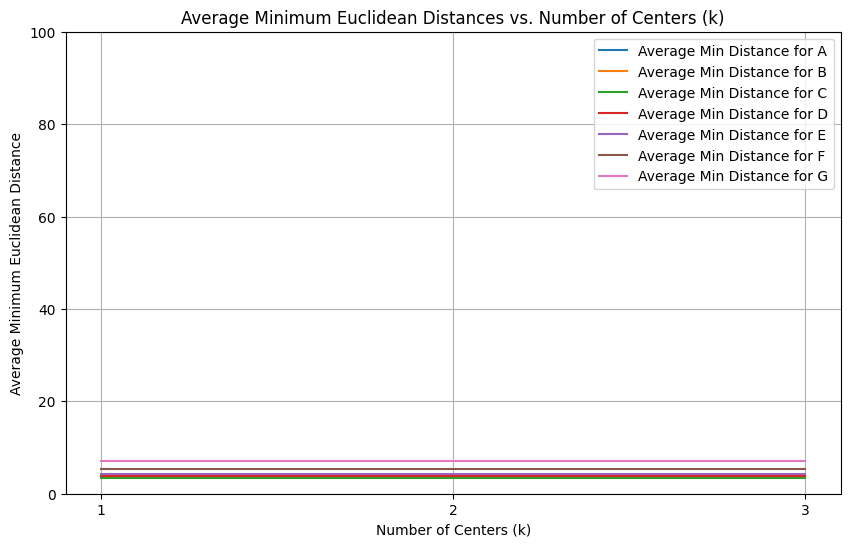

In [ ]:

def euclidean_distance(point, center):
    return np.sqrt(np.sum((point - center) ** 2))

def average_min_distance(data, centers):
    distances = []
    for index, point in data.iterrows():
        min_distance = np.min([euclidean_distance(point.values, center) for center in centers])
        distances.append(min_distance)
    return np.mean(distances)

# Values of k to test
k_values = range(1, 4)

# Store average distances for plotting
average_distances_A = []
average_distances_B = []
average_distances_C = []
average_distances_D = []
average_distances_E = []
average_distances_F = []
average_distances_G = []

for k in k_values:
    avg_dist_A = average_min_distance(A_numeric,Cen)
    avg_dist_B = average_min_distance(B_numeric,Cen)
    avg_dist_C = average_min_distance(C_numeric,Cen)
    avg_dist_D = average_min_distance(D_numeric,Cen)
    avg_dist_E = average_min_distance(E_numeric,Cen)
    avg_dist_F = average_min_distance(F_numeric,Cen)
    avg_dist_G= average_min_distance(G_numeric,Cen)

    average_distances_A.append(avg_dist_A)
    average_distances_B.append(avg_dist_B)
    average_distances_C.append(avg_dist_C)
    average_distances_D.append(avg_dist_D)
    average_distances_E.append(avg_dist_E)
    average_distances_F.append(avg_dist_F)
    average_distances_G.append(avg_dist_G)



# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, average_distances_A, label='Average Min Distance for A')
plt.plot(k_values, average_distances_B, label='Average Min Distance for B')
plt.plot(k_values, average_distances_C, label='Average Min Distance for C')
plt.plot(k_values, average_distances_D, label='Average Min Distance for D')
plt.plot(k_values, average_distances_E, label='Average Min Distance for E')
plt.plot(k_values, average_distances_F, label='Average Min Distance for F')
plt.plot(k_values, average_distances_G, label='Average Min Distance for G')
plt.title('Average Minimum Euclidean Distances vs. Number of Centers (k)')
plt.xlabel('Number of Centers (k)')
plt.ylabel('Average Minimum Euclidean Distance')
plt.ylim(0,100)
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(Cen)

[[ 0.90278401  0.90278401  0.90278401  0.90278401  0.90278401  0.90278401
   0.90278401]
 [-0.32769555 -0.32769555 -0.32769555 -0.32769555 -0.32769555 -0.32769555
  -0.32769555]
 [ 0.12139768  0.12139768  0.12139768  0.12139768  0.12139768  0.12139768
   0.12139768]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have divided your data into male and female dataframes, let's call them male_data and female_data
# Perform KMeans clustering for males
k_values =range(1,4)  # Define the values of k for clustering
costs_0 = []

for k in k_values:
    kmeans = KMeans(n_clusters=3, init=Cen, n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
    kmeans.fit(A)  # Fit KMeans to male data
    costs_0.append(kmeans.inertia_)  # Inertia_ gives the sum of squared distances of samples to their closest cluster center

# Perform KMeans clustering for females
costs_1 = []

for k in k_values:
    kmeans = KMeans(n_clusters=3, init=Cen, n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
    kmeans.fit(B)  # Fit KMeans to female data
    costs_1.append(kmeans.inertia_)
     # Inertia_ gives the sum of squared distances of samples to their closest cluster center
costs_2 = []

for k in k_values:
    kmeans = KMeans(n_clusters=3, init=Cen, n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
    kmeans.fit(C)  # Fit KMeans to female data
    costs_2.append(kmeans.inertia_)

costs_3 = []
for k in k_values:
    kmeans = KMeans(n_clusters=3, init=Cen, n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
    kmeans.fit(D)  # Fit KMeans to female data
    costs_3.append(kmeans.inertia_)

costs_4 = []
for k in k_values:
    kmeans = KMeans(n_clusters=3, init=Cen, n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
    kmeans.fit(E)  # Fit KMeans to female data
    costs_4.append(kmeans.inertia_)

costs_5 = []
for k in k_values:
    kmeans = KMeans(n_clusters=3, init=Cen, n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
    kmeans.fit(F)  # Fit KMeans to female data
    costs_5.append(kmeans.inertia_)

costs_6 = []
for k in k_values:
    kmeans = KMeans(n_clusters=3, init=Cen, n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
    kmeans.fit(G)  # Fit KMeans to female data
    costs_6.append(kmeans.inertia_)

# Plot the cost function for males and females
plt.figure(figsize=(10, 6))
plt.plot(k_values, costs_0, label='Level_0')
plt.plot(k_values, costs_1, label='Level_1')
plt.plot(k_values, costs_2, label='Level_2')
plt.plot(k_values, costs_3, label='Level_3')
plt.plot(k_values, costs_4, label='Level_4')
plt.plot(k_values, costs_5, label='Level_5')
plt.plot(k_values, costs_1, label='Level_6')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Cost functions for different levels of Education')
plt.legend()
plt.show()
print(costs_0)
print(costs_1)
print(costs_2)
print(costs_3)
print(costs_4)
print(costs_5)
print(costs_6)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: The shape of the initial centers (3, 7) does not match the number of features of the data 23.